In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("diabetic_data.csv")
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.shape

(101766, 50)

In [4]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Changing ? to NAN

In [5]:
data.replace(['?', 'None'], np.nan, inplace=True)


# Drop Duplicates

In [6]:
data.drop_duplicates(inplace=True)

# Removing columns that are irrelevant

In [7]:
cols_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty']
data.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Clean fields

In [8]:
data = data[data['gender'] != 'Unknown/Invalid']   # remove invalid gender
data['race'].fillna('Unknown', inplace=True) 

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\3571224200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['race'].fillna('Unknown', inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\3571224200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['race'].fillna('Unknown', inplace=True)


# Handling Categorical

In [9]:
data['readmitted'] = data['readmitted'].replace({'>30': 0, 'NO': 0, '<30': 1}).astype(int)


cat_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

data['change'] = data['change'].map({'Ch': 1, 'No': 0})
data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})


C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\1479763312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['readmitted'] = data['readmitted'].replace({'>30': 0, 'NO': 0, '<30': 1}).astype(int)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\1479763312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['readmitted'] = data['readmitted'].replace({'>30': 0, 'NO': 0, '<30': 1}).astype(int)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\1479763312.py:6: SettingWithCopyWarning: 
A value is trying to be set

# Convert Numeric Fields

In [10]:
numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\1351248954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')


# Handling dignosis column

In [11]:
diag_cols = ['diag_1', 'diag_2', 'diag_3']
for col in diag_cols:
    data[col].fillna('Unknown', inplace=True)
    data[col] = data[col].astype(str)
    data[col] = data[col].apply(lambda x: x[:3] if x.replace('.', '').isdigit() else 'Other')

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\3794709065.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\3794709065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna('Unknown', inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipyk

# Remove Unnecessary rows

In [12]:
key_features = ['race', 'gender', 'age', 'readmitted']
data.dropna(subset=key_features, inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\2850269747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=key_features, inplace=True)


In [13]:
data.reset_index(drop=True, inplace=True)

In [14]:
print("✅ Data cleaning completed.")
print(f"Shape after cleaning: {data.shape}")
print("\nRemaining missing values per column:")
print(data.isna().sum()[data.isna().sum() > 0])

✅ Data cleaning completed.
Shape after cleaning: (101763, 45)

Remaining missing values per column:
max_glu_serum    96417
A1Cresult        84745
dtype: int64


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101763 non-null  object
 1   gender                    101763 non-null  object
 2   age                       101763 non-null  object
 3   admission_type_id         101763 non-null  int64 
 4   discharge_disposition_id  101763 non-null  int64 
 5   admission_source_id       101763 non-null  int64 
 6   time_in_hospital          101763 non-null  int64 
 7   num_lab_procedures        101763 non-null  int64 
 8   num_procedures            101763 non-null  int64 
 9   num_medications           101763 non-null  int64 
 10  number_outpatient         101763 non-null  int64 
 11  number_emergency          101763 non-null  int64 
 12  number_inpatient          101763 non-null  int64 
 13  diag_1                    101763 non-null  object
 14  diag

In [16]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,0,0,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,1,1,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,0,1,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,1,1,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,1,1,0
101759,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,0,1,0
101760,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,1,1,0
101761,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,1,1,0


# Exploratory Data Analysis

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [19]:
print("Dataset shape:", data.shape)
print("\nColumn types:\n", data.dtypes.head())
print("\nSummary statistics:\n")
print(data.describe(include='all').T)

Dataset shape: (101763, 45)

Column types:
 race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
dtype: object

Summary statistics:

                             count unique        top    freq       mean  \
race                        101763      6  Caucasian   76099        NaN   
gender                      101763      2     Female   54708        NaN   
age                         101763     10    [70-80)   26066        NaN   
admission_type_id         101763.0    NaN        NaN     NaN   2.024017   
discharge_disposition_id  101763.0    NaN        NaN     NaN   3.715515   
admission_source_id       101763.0    NaN        NaN     NaN   5.754459   
time_in_hospital          101763.0    NaN        NaN     NaN   4.396018   
num_lab_procedures        101763.0    NaN        NaN     NaN  43.095909   
num_procedures            101763.0    NaN        NaN     NaN   1.33969

# Target Variable Distribution

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\1081415353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', data=data, palette='viridis')


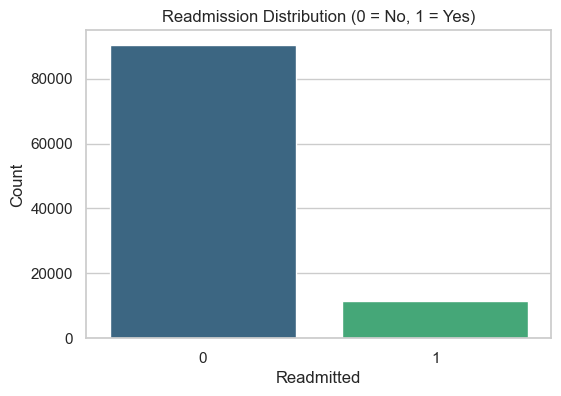

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted', data=data, palette='viridis')
plt.title('Readmission Distribution (0 = No, 1 = Yes)')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()

In [21]:
readmit_percent = data['readmitted'].mean() * 100
print(f"Percentage of patients readmitted within 30 days: {readmit_percent:.2f}%")

Percentage of patients readmitted within 30 days: 11.16%


# Readmission by  gender

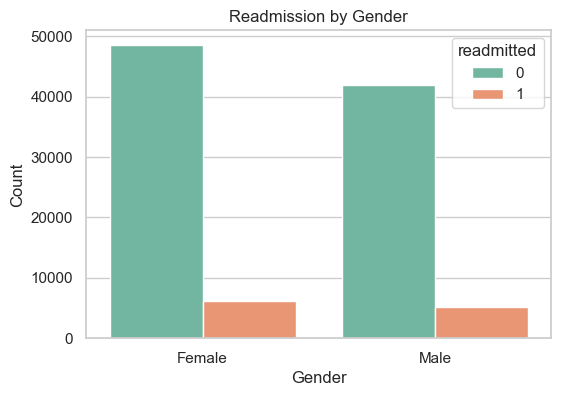

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='readmitted', data=data, palette='Set2')
plt.title('Readmission by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Readmission by age group

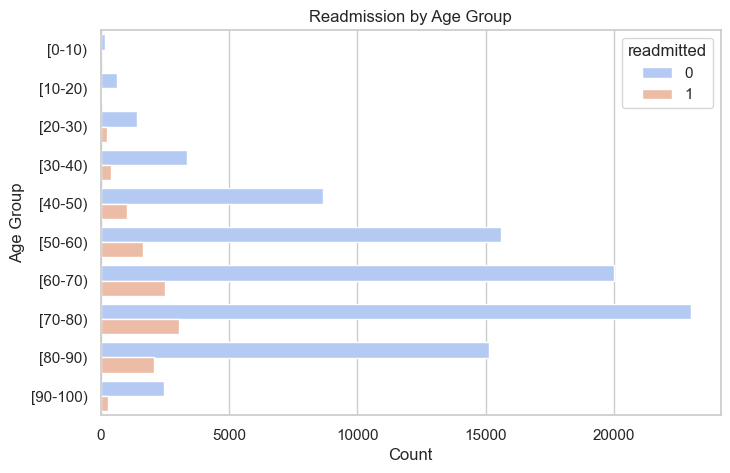

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(y='age', hue='readmitted', data=data, palette='coolwarm')
plt.title('Readmission by Age Group')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

# Readmission v/s Number of Medications

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\3850399601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y='num_medications', data=data, palette='magma')


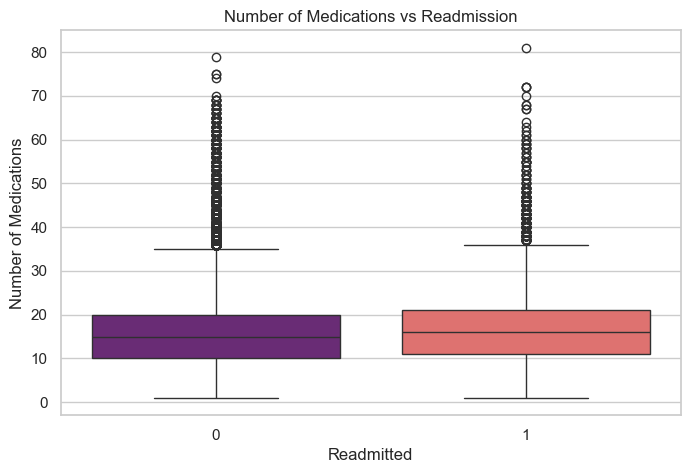

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='readmitted', y='num_medications', data=data, palette='magma')
plt.title('Number of Medications vs Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Number of Medications')
plt.show()

# Numerical Features

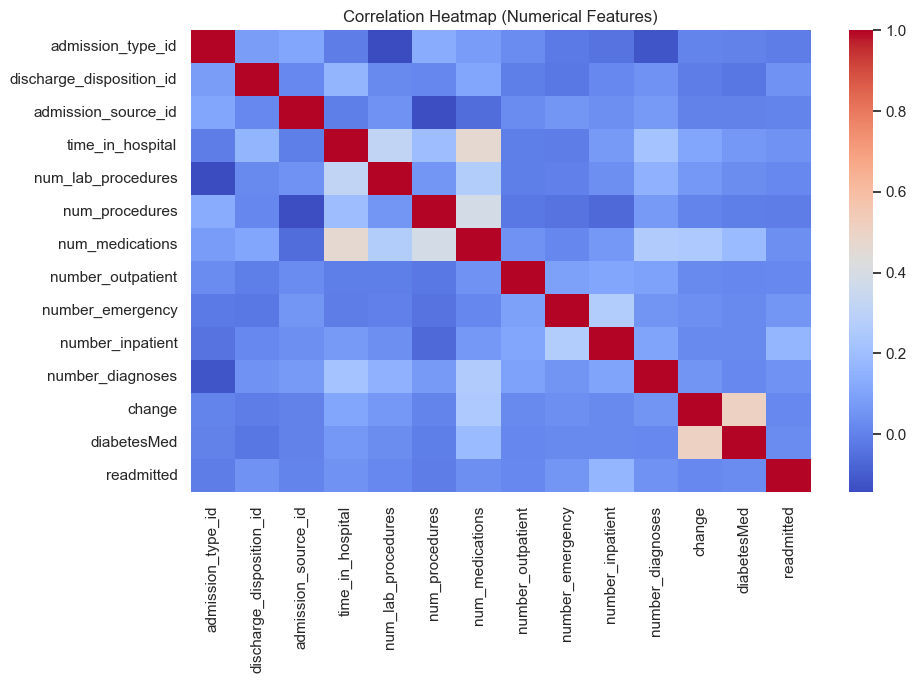

In [25]:
plt.figure(figsize=(10, 6))
numeric_features = data.select_dtypes(include=['int64', 'float64'])
corr = numeric_features.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

# Readmission by Race

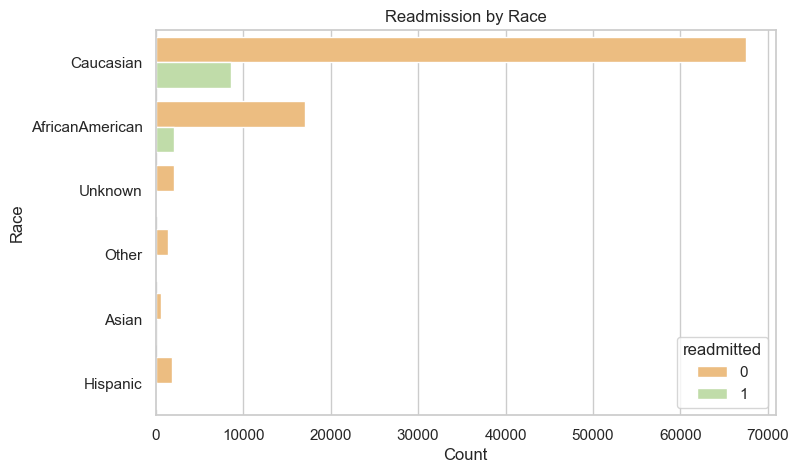

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(y='race', hue='readmitted', data=data, palette='Spectral')
plt.title('Readmission by Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

# Readmission v/s Time in Hospital

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\3359169019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y='time_in_hospital', data=data, palette='cubehelix')


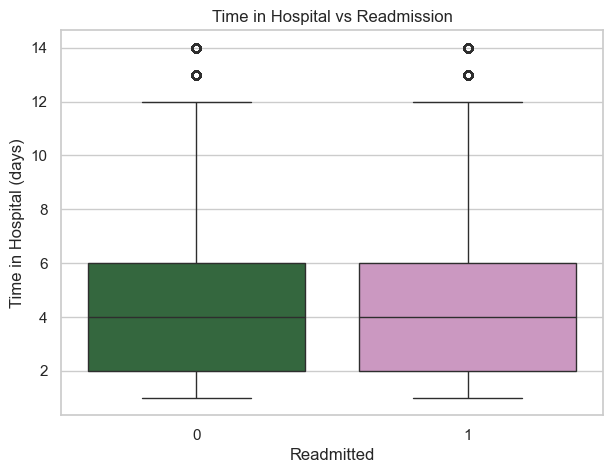

In [27]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='readmitted', y='time_in_hospital', data=data, palette='cubehelix')
plt.title('Time in Hospital vs Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital (days)')
plt.show()

# No of Dignosis v/s Readmission

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17648\4234498714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y='number_diagnoses', data=data, palette='plasma')


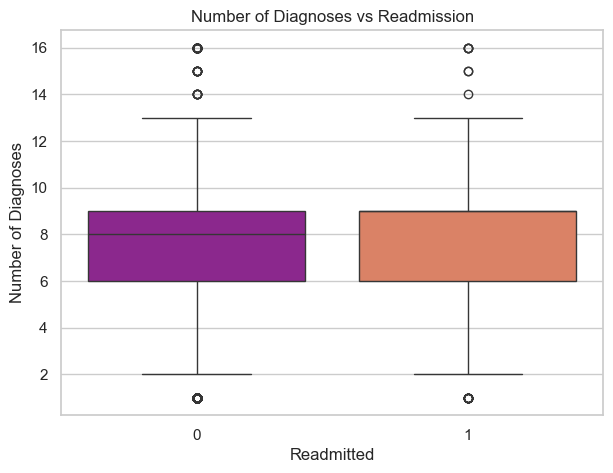

In [28]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='readmitted', y='number_diagnoses', data=data, palette='plasma')
plt.title('Number of Diagnoses vs Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Number of Diagnoses')
plt.show()

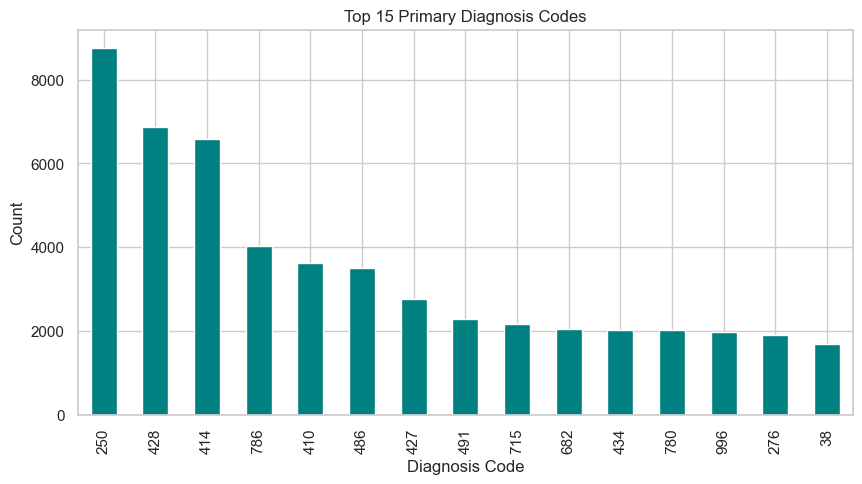

In [29]:
plt.figure(figsize=(10, 5))
data['diag_1'].value_counts().head(15).plot(kind='bar', color='teal')
plt.title('Top 15 Primary Diagnosis Codes')
plt.xlabel('Diagnosis Code')
plt.ylabel('Count')
plt.show()

# Feature Engineering

In [30]:
features = data.copy()

In [31]:
features['polypharmacy'] = (features['num_medications'] > 10).astype(int)

In [32]:
def chronic_flag(x):
    if str(x).startswith(('250', '249')):     
        return 'diabetes'
    elif str(x).startswith(('401', '402', '403', '404', '405')):  
        return 'hypertension'
    elif str(x).startswith(('428',)):          
        return 'heart_failure'
    elif str(x).startswith(('414',)):          
        return 'coronary_disease'
    elif str(x).startswith(('585',)):         
        return 'renal_disease'
    elif str(x).startswith(('493',)):          
        return 'asthma'
    else:
        return 'other'

# Apply to each diagnosis column and create counts
for col in ['diag_1', 'diag_2', 'diag_3']:
    features[col + '_group'] = features[col].apply(chronic_flag)

# Count how many chronic illnesses per patient
chronic_cols = ['diag_1_group', 'diag_2_group', 'diag_3_group']
features['chronic_count'] = features[chronic_cols].apply(
    lambda x: sum([i != 'other' for i in x]), axis=1
)


features['total_visits'] = (
    features['number_outpatient'] + 
    features['number_emergency'] + 
    features['number_inpatient']
)


# High Risk Age Group Flag
features['high_risk_age'] = features['age'].apply(
    lambda x: 1 if x in ['[70-80)', '[80-90)', '[90-100)'] else 0
)


#  Average Procedures per Hospital Stay
features['avg_procedures_per_stay'] = (
    features['num_procedures'] / features['time_in_hospital']
).replace([np.inf, -np.inf], 0)


# Interaction Term: Diabetes Medication × Change
# This highlights if diabetes meds were changed recentlyc 
features['med_change_interaction'] = features['diabetesMed'] * features['change']


#  Drop redundant diagnosis text columns 
features.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)


# Show a few new engineered columns
print("\nNew feature columns created:")
print(['polypharmacy', 'chronic_count', 'total_visits', 
       'high_risk_age', 'avg_procedures_per_stay', 'med_change_interaction'])


features.head()



New feature columns created:
['polypharmacy', 'chronic_count', 'total_visits', 'high_risk_age', 'avg_procedures_per_stay', 'med_change_interaction']


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,readmitted,polypharmacy,diag_1_group,diag_2_group,diag_3_group,chronic_count,total_visits,high_risk_age,avg_procedures_per_stay,med_change_interaction
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,0,0,diabetes,other,other,1,0,0,0.0,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,0,1,other,diabetes,other,1,0,0,0.0,1
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,0,1,other,diabetes,other,1,3,0,2.5,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,0,1,other,diabetes,hypertension,2,0,0,0.5,1
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,0,0,other,other,diabetes,1,0,0,0.0,1


# Model Train

Accuracy: 0.8888
Recall: 0.0026

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18084
           1       0.86      0.00      0.01      2269

    accuracy                           0.89     20353
   macro avg       0.87      0.50      0.47     20353
weighted avg       0.89      0.89      0.84     20353



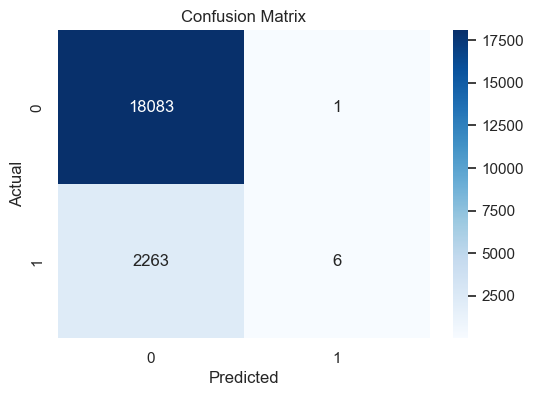

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separate features and target
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Encode categorical columns if any
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)  
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Making Batterments

In [36]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score
from xgboost import XGBClassifier


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Clean column names for XGBoost
X_train_res = pd.DataFrame(X_train_res, columns=[str(c) for c in X_train.columns])
X_test_df = pd.DataFrame(X_test, columns=[str(c) for c in X_train.columns])

# Replace invalid symbols for XGBoost
X_train_res.columns = X_train_res.columns.str.replace(r'[\[\]<>() ]', '_', regex=True)
X_test_df.columns = X_test_df.columns.str.replace(r'[\[\]<>() ]', '_', regex=True)


# Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_res, y_train_res)


# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200, class_weight='balanced', random_state=42
)
rf_model.fit(X_train_res, y_train_res)

y_pred = rf_model.predict(X_test_df)

print("=== Random Forest Results ===")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Custom threshold (0.3)
y_proba = rf_model.predict_proba(X_test_df)[:, 1]
y_pred_threshold = (y_proba > 0.3).astype(int)
print("\nClassification Report (threshold=0.3):\n", classification_report(y_test, y_pred_threshold))


# XGBoost Classifier
xgb = XGBClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test_df)
print("\n=== XGBoost Results (default threshold=0.5) ===")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# XGBoost with custom threshold
y_pred_prob_xgb = xgb.predict_proba(X_test_df)[:, 1]
y_pred_xgb_thresh = (y_pred_prob_xgb > 0.3).astype(int)
print("\n=== XGBoost Results (threshold=0.3) ===")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_thresh))


C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Random Forest Results ===
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     18082
           1       0.29      0.02      0.04      2271

    accuracy                           0.88     20353
   macro avg       0.59      0.51      0.49     20353
weighted avg       0.82      0.88      0.84     20353

Confusion Matrix:
 [[17955   127]
 [ 2219    52]]
F1 Score: 0.04244897959183674
Recall: 0.02289740202553941

Classification Report (threshold=0.3):
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     18082
           1       0.17      0.18      0.17      2271

    accuracy                           0.81     20353
   macro avg       0.53      0.53      0.53     20353
weighted avg       0.82      0.81      0.81     20353


=== XGBoost Results (default threshold=0.5) ===
Classification Report:
               precision    recall  f1-score   support

           0   

In [38]:
rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=20,
    class_weight={0: 1, 1: 10},  # emphasize minority class
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)

xgb = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=8,   # increase this for higher recall
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_res, y_train_res)

y_proba = xgb.predict_proba(X_test_df)[:, 1]
best_thresh = 0.25  # start low for high recall
y_pred = (y_proba > best_thresh).astype(int)

print(classification_report(y_test, y_pred))

rf_proba = rf_model.predict_proba(X_test_df)[:, 1]
xgb_proba = xgb.predict_proba(X_test_df)[:, 1]

ensemble_proba = (rf_proba * 0.4 + xgb_proba * 0.6)  # XGBoost weighted slightly more
y_pred_ensemble = (ensemble_proba > 0.25).astype(int)

print("\n=== Ensemble Results (threshold=0.25) ===")
print(classification_report(y_test, y_pred_ensemble))
print(confusion_matrix(y_test, y_pred_ensemble))


              precision    recall  f1-score   support

           0       0.96      0.15      0.25     18082
           1       0.12      0.95      0.22      2271

    accuracy                           0.24     20353
   macro avg       0.54      0.55      0.24     20353
weighted avg       0.86      0.24      0.25     20353


=== Ensemble Results (threshold=0.25) ===
              precision    recall  f1-score   support

           0       0.98      0.01      0.01     18082
           1       0.11      1.00      0.20      2271

    accuracy                           0.12     20353
   macro avg       0.55      0.50      0.11     20353
weighted avg       0.88      0.12      0.03     20353

[[   92 17990]
 [    2  2269]]
